#### Foi dado a partida para o primeiro Challenge de Data Science da Alura, nesta primeira semana do Challenge, foi nos passado as seguintes atividades:

1. Entender quais informações o conjunto de dados possui;

2. Analisar quais os tipos de dados;

3. Verificar quais são as inconsistências nos dados;

4. Corrigir as inconsistências nos dados;

5. Traduzir as colunas;

6. Criar coluna de contas diárias.

# Importando dados

## Lendo o arquivo Json e conhecendo os dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
dados = pd.read_json("https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json")


In [2]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Normalizando os dados separadamente

In [3]:
dados_customer = pd.json_normalize(data=dados.customer)
dados_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [4]:
dados_phone = pd.json_normalize(data=dados.phone)
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [5]:
dados_internet = pd.json_normalize(data=dados.internet)
dados_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [6]:
dados_account = pd.json_normalize(data=dados.account)
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [7]:
dados.head(1)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [8]:
dados_limp = dados.drop(columns=['customer', 'phone', 'internet', 'account'])
dados_limp

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


# Juntando os dados normalizados

In [9]:
dataset = pd.concat([dados_limp, dados_customer,dados_phone, dados_internet, dados_account], axis=1)
dataset

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Modificando as Configurações

In [10]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns",100)

# Analisando os tipos de dados

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [12]:
dataset.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [13]:
dataset.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

# Traduzindo colunas

In [14]:
dataset.columns = ['ID', 'Churn', 'Sexo', 'Sênior', 'Parceiro', 'Dependentes', 'MesesDeContrato', 'Telefone', 'VáriasLinhas', 'SegurançaOnline','ServiçoInternet', 'BackupOnline', 'ProteçãoDispositivo', 'SuporteTécnico', 'StreamingTV', 'StreamingFilmes', 'Contato', 'FaturamentoSemPapel', 'FormaDePagamento', 'EncargosMensal', 'EncargosTotal']
dataset.head()

,ID,Churn,Sexo,Sênior,Parceiro,Dependentes,Posse,Telefone,VáriasLinhas,SegurançaOnline,ServiçoInternet,BackupOnline,ProteçãoDispositivo,SuporteTécnico,StreamingTV,StreamingFilmes,Contato,FaturamentoSemPapel,FormaDePagamento,EncargosMensal,EncargosTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Agora vamos verificar quais são as inconsistências nos dados e corrigir as inconsistências nos dados, passando por cada coluna

# Verificando a coluna ID

In [15]:
dataset['ID'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [16]:
dataset['ID'].value_counts()

0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: ID, Length: 7267, dtype: int64

# Verificando a coluna Churn

In [17]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

In [18]:
filtro  = dataset['Churn'] != ''
dataset = dataset[filtro]

dataset.head()

In [19]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [20]:
dataset.shape

(7043, 21)

(-1.117218204587607,
 1.1008199145041717,
 -1.1101299214113773,
 1.119426955701786)

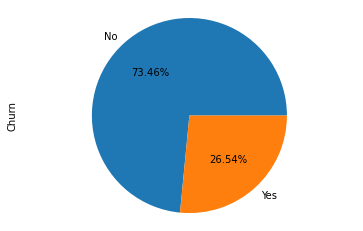

In [21]:
# Com Pandas
dataset['Churn'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo


C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


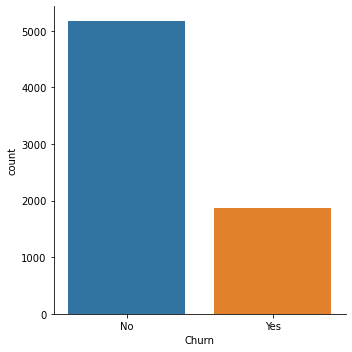

In [22]:
# Com Seaborn
sns.factorplot('Churn', data=dataset, kind='count')

In [23]:
grupamento = dataset[['Churn', 'EncargosMensal']].groupby(by='Churn')
grupamento.describe().round()

EncargosMensal                                           
               count  mean   std   min   25%   50%   75%    max
Churn                                                          
No            5174.0  61.0  31.0  18.0  25.0  64.0  88.0  119.0
Yes           1869.0  74.0  25.0  19.0  56.0  80.0  94.0  118.0

# Verificando a coluna sexo

In [24]:
dataset['Sexo'].unique()

array(['Female', 'Male'], dtype=object)

In [25]:
dataset['Sexo'].value_counts()

Male      3555
Female    3488
Name: Sexo, dtype: int64

In [26]:
#Traduzindo dados da Coluna Contato
dataset['Sexo'] = dataset['Sexo'].str.replace('Male','Masculino')
dataset['Sexo'] = dataset['Sexo'].str.replace('Female', 'Feminino')

C:\Users\PC\AppData\Local\Temp/ipykernel_13044/1574621534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sexo'] = dataset['Sexo'].str.replace('Male','Masculino')
C:\Users\PC\AppData\Local\Temp/ipykernel_13044/1574621534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sexo'] = dataset['Sexo'].str.replace('Female', 'Feminino')


(-1.103690781218152,
 1.1001757514865786,
 -1.1040952518372837,
 1.1021533979165719)

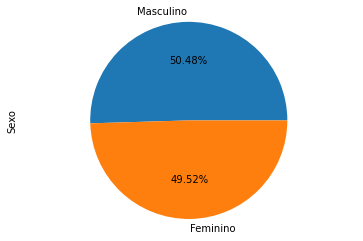

In [27]:
# Com Pandas
dataset['Sexo'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo

In [28]:
grupamento = dataset[['Sexo', 'EncargosMensal']].groupby(by='Sexo')
grupamento.describe().round()

EncargosMensal                                           
                   count  mean   std   min   25%   50%   75%    max
Sexo                                                               
Feminino          3488.0  65.0  30.0  18.0  36.0  71.0  90.0  119.0
Masculino         3555.0  64.0  30.0  18.0  35.0  70.0  90.0  118.0

# Verificando a coluna Sênior

In [29]:
dataset['Sênior'].unique()

array([0, 1], dtype=int64)

In [30]:
dataset['Sênior'].isnull().sum()

0

In [31]:
dataset['Sênior'].value_counts()

0    5901
1    1142
Name: Sênior, dtype: int64

In [32]:
grupamento = dataset[['Sênior', 'EncargosMensal']].groupby(by='Sênior')
grupamento.describe().round()

EncargosMensal                                           
                count  mean   std   min   25%   50%   75%    max
Sênior                                                          
0              5901.0  62.0  30.0  18.0  26.0  66.0  87.0  119.0
1              1142.0  80.0  24.0  19.0  70.0  85.0  98.0  117.0

# Verificando a coluna Parceiro

In [33]:
dataset['Parceiro'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
dataset['Parceiro'].value_counts()

No     3641
Yes    3402
Name: Parceiro, dtype: int64

In [35]:
grupamento = dataset[['Parceiro', 'EncargosMensal']].groupby(by='Parceiro')
grupamento.describe().round()

EncargosMensal                                           
                  count  mean   std   min   25%   50%   75%    max
Parceiro                                                          
No               3641.0  62.0  29.0  18.0  34.0  69.0  85.0  119.0
Yes              3402.0  68.0  31.0  18.0  39.0  75.0  94.0  119.0

# Verificando a coluna Dependentes

In [36]:
dataset['Dependentes'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
dataset['Dependentes'].value_counts()

No     4933
Yes    2110
Name: Dependentes, dtype: int64

In [38]:
grupamento = dataset[['Dependentes', 'EncargosMensal']].groupby(by='Dependentes')
grupamento.describe().round()

EncargosMensal                                           
                     count  mean   std   min   25%   50%   75%    max
Dependentes                                                          
No                  4933.0  67.0  29.0  18.0  45.0  74.0  91.0  119.0
Yes                 2110.0  60.0  31.0  19.0  24.0  61.0  86.0  119.0

# Vefiricando a coluna MesesDeContrato

In [39]:
dataset['MesesDeContrato'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0], dtype=int64)

In [40]:
dataset['MesesDeContrato'].isnull().sum()

0

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Posse', ylabel='Density'>

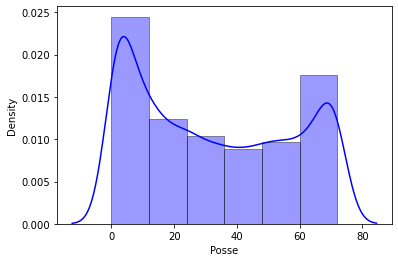

In [41]:
sns.distplot(dataset['MesesDeContrato'], hist = True, kde = True,
             bins = 6, color = 'blue',
             hist_kws={'edgecolor': 'black'})

# Verificando coluna Telefone

In [42]:
dataset['Telefone'].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
dataset['Telefone'].value_counts()

Yes    6361
No      682
Name: Telefone, dtype: int64

In [44]:
grupamento = dataset[['Telefone', 'EncargosMensal']].groupby(by='Telefone')
grupamento.describe().round()

EncargosMensal                                           
                  count  mean   std   min   25%   50%   75%    max
Telefone                                                          
No                682.0  42.0  11.0  23.0  34.0  41.0  51.0   67.0
Yes              6361.0  67.0  30.0  18.0  45.0  75.0  91.0  119.0

# Verificando coluna VáriasLinhas

In [45]:
dataset['VáriasLinhas'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [46]:
dataset['VáriasLinhas'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: VáriasLinhas, dtype: int64

In [47]:
grupamento = dataset[['VáriasLinhas', 'EncargosMensal']].groupby(by='VáriasLinhas')

In [48]:
grupamento.mean().round()

,EncargosMensal
VáriasLinhas,
No,54.0
No phone service,42.0
Yes,82.0


# Verificando coluna SegurançaOnline

In [49]:
dataset['SegurançaOnline'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [50]:
dataset['SegurançaOnline'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: SegurançaOnline, dtype: int64

In [51]:
grupamento = dataset[['SegurançaOnline', 'EncargosMensal']].groupby(by='SegurançaOnline')

In [52]:
grupamento.mean().round()

,EncargosMensal
SegurançaOnline,
DSL,58.0
Fiber optic,92.0
No,21.0


# Verificando coluna ServiçoInternet

In [53]:
dataset['ServiçoInternet'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [54]:
dataset['ServiçoInternet'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: ServiçoInternet, dtype: int64

In [55]:
grupamento = dataset[['ServiçoInternet', 'EncargosMensal']].groupby(by='ServiçoInternet')

In [56]:
grupamento.mean().round()

,EncargosMensal
ServiçoInternet,
No,76.0
No internet service,21.0
Yes,79.0


# Verificando coluna BackupOnline

In [57]:
dataset['BackupOnline'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [58]:
dataset['BackupOnline'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: BackupOnline, dtype: int64

In [59]:
grupamento = dataset[['BackupOnline', 'EncargosMensal']].groupby(by='BackupOnline')

In [60]:
grupamento.mean().round()

,EncargosMensal
BackupOnline,
No,72.0
No internet service,21.0
Yes,83.0


# Verificando coluna ProteçãoDispositivo

In [61]:
dataset['ProteçãoDispositivo'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [62]:
dataset['ProteçãoDispositivo'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: ProteçãoDispositivo, dtype: int64

In [63]:
grupamento = dataset[['ProteçãoDispositivo', 'EncargosMensal']].groupby(by='ProteçãoDispositivo')

In [64]:
grupamento.describe().round()

EncargosMensal                                            
                             count  mean   std   min   25%   50%    75%    max
ProteçãoDispositivo                                                           
No                          3095.0  71.0  21.0  23.0  54.0  74.0   86.0  111.0
No internet service         1526.0  21.0   2.0  18.0  20.0  20.0   21.0   27.0
Yes                         2422.0  85.0  21.0  29.0  70.0  89.0  103.0  119.0

# Verificando coluna SuporteTécnico

In [65]:
dataset['SuporteTécnico'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [66]:
dataset['SuporteTécnico'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: SuporteTécnico, dtype: int64

In [67]:
grupamento = dataset[['SuporteTécnico', 'EncargosMensal']].groupby(by='SuporteTécnico')

In [68]:
grupamento.describe().round()

EncargosMensal                                            
                             count  mean   std   min   25%   50%    75%    max
SuporteTécnico                                                                
No                          3473.0  75.0  21.0  23.0  56.0  78.0   92.0  113.0
No internet service         1526.0  21.0   2.0  18.0  20.0  20.0   21.0   27.0
Yes                         2044.0  81.0  22.0  29.0  64.0  82.0  100.0  119.0

# Verificando coluna StreamingTV

In [69]:
dataset['StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [70]:
dataset['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [71]:
grupamento = dataset[['StreamingTV', 'EncargosMensal']].groupby(by='StreamingTV')
grupamento.describe().round()

EncargosMensal                                            
                             count  mean   std   min   25%   50%    75%    max
StreamingTV                                                                   
No                          2810.0  65.0  19.0  23.0  50.0  70.0   80.0  107.0
No internet service         1526.0  21.0   2.0  18.0  20.0  20.0   21.0   27.0
Yes                         2707.0  89.0  18.0  34.0  79.0  93.0  103.0  119.0

# Verificando coluna StreamingFilmes

In [72]:
dataset['StreamingFilmes'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [73]:
dataset['StreamingFilmes'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingFilmes, dtype: int64

In [74]:
grupamento = dataset[['StreamingFilmes', 'EncargosMensal']].groupby(by='StreamingFilmes')
grupamento.describe().round()

EncargosMensal                                            
                             count  mean   std   min   25%   50%    75%    max
StreamingFilmes                                                               
No                          2785.0  65.0  19.0  23.0  50.0  70.0   80.0  107.0
No internet service         1526.0  21.0   2.0  18.0  20.0  20.0   21.0   27.0
Yes                         2732.0  88.0  19.0  34.0  79.0  93.0  103.0  119.0

# Verificando coluna Contato

In [75]:
dataset['Contato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [76]:
dataset['Contato'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contato, dtype: int64

In [77]:
#Traduzindo dados da Coluna Contato
dataset['Contato'] = dataset['Contato'].str.replace('One year','Um Ano')
dataset['Contato'] = dataset['Contato'].str.replace('Month-to-month', 'Mês a mês')
dataset['Contato'] = dataset['Contato'].str.replace('Two year', 'Dois Anos')
dataset['Contato'].value_counts()

C:\Users\PC\AppData\Local\Temp/ipykernel_13044/503456310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Contato'] = dataset['Contato'].str.replace('One year','Um Ano')
C:\Users\PC\AppData\Local\Temp/ipykernel_13044/503456310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Contato'] = dataset['Contato'].str.replace('Month-to-month', 'Mês a mês')
C:\Users\PC\AppData\Local\Temp/ipykernel_13044/503456310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Mês a mês    3875
Dois Anos    1695
Um Ano       1473
Name: Contato, dtype: int64

In [78]:
grupamento = dataset[['Contato', 'EncargosMensal']].groupby(by='Contato')
grupamento.describe().round()

EncargosMensal                                           
                   count  mean   std   min   25%   50%   75%    max
Contato                                                            
Dois Anos         1695.0  61.0  35.0  18.0  24.0  64.0  90.0  119.0
Mês a mês         3875.0  66.0  27.0  19.0  46.0  73.0  89.0  117.0
Um Ano            1473.0  65.0  32.0  18.0  27.0  69.0  95.0  119.0

# Verificando tabela FaturamentoSemPapel

In [79]:
dataset['FaturamentoSemPapel'].unique()

array(['Yes', 'No'], dtype=object)

In [80]:
dataset['FaturamentoSemPapel'].value_counts()

Yes    4171
No     2872
Name: FaturamentoSemPapel, dtype: int64

In [81]:
grupamento = dataset[['FaturamentoSemPapel', 'EncargosMensal']].groupby(by='FaturamentoSemPapel')
grupamento.describe().round()

EncargosMensal                                           
                             count  mean   std   min   25%   50%   75%    max
FaturamentoSemPapel                                                          
No                          2872.0  52.0  30.0  18.0  20.0  50.0  78.0  119.0
Yes                         4171.0  74.0  27.0  19.0  55.0  79.0  95.0  119.0

# Verificando tabela FormaDePagamento

In [82]:
dataset['FormaDePagamento'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [83]:
dataset['FormaDePagamento'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: FormaDePagamento, dtype: int64

In [84]:
#Traduzindo dados da Coluna
dataset['FormaDePagamento'] = dataset['FormaDePagamento'].str.replace('Electronic check','Cheque eletrônico')
dataset['FormaDePagamento'] = dataset['FormaDePagamento'].str.replace('Mailed check', 'Cheque enviado')
dataset['FormaDePagamento'] = dataset['FormaDePagamento'].str.replace('Bank transfer (automatic)', 'Transferência bancária')
dataset['FormaDePagamento'] = dataset['FormaDePagamento'].str.replace('Credit card (automatic)', 'Cartão de crédito ')
dataset['FormaDePagamento'].value_counts()

C:\Users\PC\AppData\Local\Temp/ipykernel_13044/4130569115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['FormaDePagamento'] = dataset['FormaDePagamento'].str.replace('Electronic check','Cheque eletrônico')
C:\Users\PC\AppData\Local\Temp/ipykernel_13044/4130569115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['FormaDePagamento'] = dataset['FormaDePagamento'].str.replace('Mailed check', 'Cheque enviado')
C:\Users\PC\AppData\Local\Temp/ipykernel_13044/4130569115.py:4: FutureWarning:

Cheque eletrônico            2365
Cheque enviado               1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: FormaDePagamento, dtype: int64

In [85]:
grupamento = dataset[['FormaDePagamento', 'EncargosMensal']].groupby(by='FormaDePagamento')
grupamento.describe().round()

EncargosMensal                                      \
                                   count  mean   std   min   25%   50%   75%   
FormaDePagamento                                                               
Bank transfer (automatic)         1544.0  67.0  31.0  18.0  41.0  73.0  93.0   
Cheque eletrônico                 2365.0  76.0  24.0  19.0  60.0  81.0  95.0   
Cheque enviado                    1612.0  44.0  26.0  19.0  20.0  35.0  65.0   
Credit card (automatic)           1522.0  67.0  31.0  18.0  39.0  73.0  91.0   

                                  
                             max  
FormaDePagamento                  
Bank transfer (automatic)  119.0  
Cheque eletrônico          119.0  
Cheque enviado             119.0  
Credit card (automatic)    118.0

# Verificando coluna EncargosMensal

In [86]:
dataset['EncargosMensal'].isnull().sum()

0

In [87]:
dataset['EncargosMensal'].mean()

64.7616924605992

In [88]:
dataset['EncargosMensal'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: EncargosMensal, dtype: float64

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EncargosMensal', ylabel='Density'>

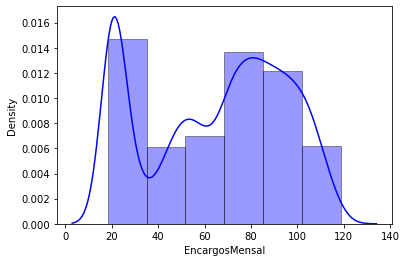

In [89]:
sns.distplot(dataset['EncargosMensal'], hist = True, kde = True,
             bins = 6, color = 'blue',
             hist_kws={'edgecolor': 'black'})

# Verificando coluna EncargosTotal

In [90]:
dataset['EncargosTotal'].isnull().sum()

0

In [91]:
dataset['EncargosTotal'] = pd.to_numeric(dataset['EncargosTotal'],errors = 'coerce')

C:\Users\PC\AppData\Local\Temp/ipykernel_13044/2763042915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['EncargosTotal'] = pd.to_numeric(dataset['EncargosTotal'],errors = 'coerce')


In [92]:
dataset['EncargosTotal'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: EncargosTotal, dtype: float64

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EncargosTotal', ylabel='Density'>

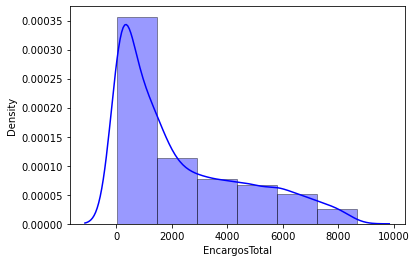

In [93]:
sns.distplot(dataset['EncargosTotal'], hist = True, kde = True,
             bins = 6, color = 'blue',
             hist_kws={'edgecolor': 'black'})

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'EncargosTotal'}, xlabel='EncargosTotal'>

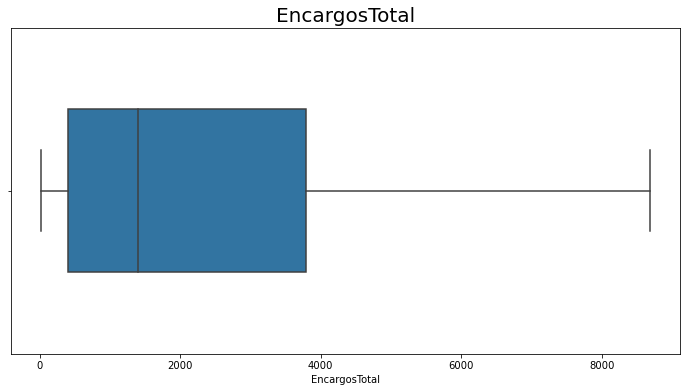

In [94]:
ax = sns.boxplot('EncargosTotal', data=dataset, width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('EncargosTotal', fontsize=20)
ax

# Adicionando a coluna de gastos diarios do cliente

In [95]:
GastoDiario = round((dataset['EncargosMensal'] / 30), 2)

dataset.insert(loc = 18,
          column = 'GastoDiario',
          value = GastoDiario)

In [96]:
dataset.head()

,ID,Churn,Sexo,Sênior,Parceiro,Dependentes,Posse,Telefone,VáriasLinhas,SegurançaOnline,ServiçoInternet,BackupOnline,ProteçãoDispositivo,SuporteTécnico,StreamingTV,StreamingFilmes,Contato,FaturamentoSemPapel,GastoDiario,FormaDePagamento,EncargosMensal,EncargosTotal
0,0002-ORFBO,No,Feminino,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Um Ano,Yes,2.19,Cheque enviado,65.6,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Mês a mês,No,2.00,Cheque enviado,59.9,542.40
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Mês a mês,Yes,2.46,Cheque eletrônico,73.9,280.85
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Mês a mês,Yes,3.27,Cheque eletrônico,98.0,1237.85
4,0013-EXCHZ,Yes,Feminino,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Mês a mês,Yes,2.80,Cheque enviado,83.9,267.40


In [97]:
dataset['GastoDiario'].describe()

count    7043.000000
mean        2.158675
std         1.003088
min         0.610000
25%         1.180000
50%         2.340000
75%         2.990000
max         3.960000
Name: GastoDiario, dtype: float64

In [98]:
dataset['GastoDiario'].isnull().sum()

0